# Data Understanding

# LISUM01: Data science Group 1

Members:
1. William Ogweli Okomba, Kenya
2. Ece Kurnaz, Turkey
3. Collin Mburugu, Kenya
4. Udbhav Balaji, India

# 1. Defining the Question

## 1.1 Specifying the Data Analysis Question
Create a bank term deposit model to predict whether a customer will accept the product or not based on  the historical data in the given dataset. Select one or several suitable learning algorithms and a suitable metric for assessing quality model.


## 1.2 Defining the Metric for Success
Since the problem we are tackling is a classification problem, we will use classification reports and confusion matrices as well as accuracy and precision scores to measure the success of the models used.

## 1.3 Problem statement

ABC bank (a Portuguese banking institution) has a term deposit product that is desired to be sold to clients. We will focus on customer's past interactions with the bank or other financial institutions to have a better understanding on whether these particular clients will buy this product or not. Developing a model with using machine learning for this aim is reasonable. With performing this project, our aim is to save resources and time for ABC bank.


## 1.4 Business Understanding

Bank term deposit is a deposit product by ABC Bank with is offered to their customers in Portugal.
The potential customers are likely to buy the product when educated by marketing channel (tele marketing, SMS/email marketing etc) personnels.

The approval is based on a variety of information, from basic biographical data to the loan applications that come through daily.

We work with the product team as a data scientists to help create effective predictive  model used to assess the customer chances of buying the product.

## 1.5 Recording the Experimental Design
- load libraries and dataset
- clean dataset:
    - deal with duplicate and/or missing values
    - deal with outliers, where necessary
    - deal with other anomalies in the data, where necessary
- carry out exploratory data analysis
- carry out feature engineering
- carry out modeling
    - tune hyperparameters
    - feature selection
    - alternative models
- summarize and provide recommendations
- challenge the solution


## 1.6 Data Attribute Information:

Dataset link: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### bank client data:
Before proceeding, let us fully understand the columns of the data. According to the source the attrinutes are as follows:

* 1. age (Age of the Customer) - Numerical
* 2. job (Type of Job) - Categorical - Possible Values - ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3.  marital (Marital Status) - Categorical - Possible Values - ( 'divorced','married','single','unknown'); NOTE: 'divorced' includes divorced and widowed
* 4. education (Education Level) - Categorical - Possible Values - ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* 5. default (Has credit in Default) - Categorical - Possible Values - ('no','yes','unknown')
* 6. housing (Has Housing Loan) - Categorical - Possible Values - ('no','yes','unknown')

###  related with the last contact of the current campaign:
* 7. loan (Has Personal Loan) - Categorical - Possible Values - ('no','yes','unknown')
* 8. contact (Type of Communication) - Categorical - Possible Values - ('cellular','telephone')
* 9. month (Month of Last Contact) - Categorical - Possible Values - ('jan', 'feb', 'mar', ..., 'nov', 'dec')
* 10. day_of_week (Day of Week of Last Contact) - Categorical - Possible Values - ('mon','tue','wed','thu','fri')
* 11.  (Last Contact Duration in seconds) - Numerical; IMPORTANT NOTE = (If duration=0, y="No')

### other attributes:
* 12. campaign (Number of Contacts performed during this campaign for this client) - Numerical
* 13. pdays (Number of days passed after client was contacted from a previous campaign ; 999 - Not Previously Contacted)
* 14. previous (Number of contacts performed before this campaign and for this client) - Numerical
* 15. poutcome (Outcome of the previous marketing campaign) - Categorical Values - Possible Values - ('failure','nonexistent','success)

###  social and economic context attributes
* 16. emp.var.rate: employment variation rate - quarterly indicator(Quarterly Indicator of Employment Variation Rate) - Numerical
* 17. cons_price_idx (Monthly Indicator of Consumer Price Index) - Numerical
* 18. cons_conf_idx (Monthly Indicator of Consumer Confidence Index) - Numerical
* 19. euribor3m (Daily Indicator of Euribor 3 Month Rate) - Numerical
*  (Quarterly Indicator of Number of Employees) - Numerical
* 20. nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
* 21.y (Target Feature - Has the client subscribed to a term deposit) - Binary - Possible Values - ('yes','no')

## 2.0 Data Preparation

In [54]:
#loading required libraries

import pandas as pd # load Pandas for reading the file
import numpy as np # load numpy for computation
import seaborn as sns # load searborn for visualization
import matplotlib.pyplot as plt # lead matplotlib for visualization
from scipy import stats
import warnings# to ignore warnings
warnings.filterwarnings("ignore")

#### 2.1 loading 2 dataset (bank_additional_full.csv  and bank_additiona.csv)

In [55]:
# load the  datasets
bank_df= pd.read_csv('Data/bank_additional_full.csv',sep=";")
# bank= pd.read_csv('bank_additional.csv', sep=";")

## 3.0 Data Understanding

In [56]:
# 3.1a checking the first 5 colunms for bank df
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [57]:
#3.1b checking the last 5 columns for bank_df
bank_df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [58]:
# 3.1c checking the first 5 colunms for bank dataset
# bank.head()

In [59]:
# 3.1d checking the last 5 colunms for bank dataset
# bank.tail()

Observation: The dataset is uniform from top to bottom

In [60]:
#3.2  check dataset records and columns
print( "The dataset bank_df has {} records". format(bank_df.shape[0]))
print( "The dataset bank_df has {} columns". format(bank_df.shape[1]))
print("***"*20)
# print( "The dataset bank has {} records". format(bank.shape[0]))
# print( "The dataset bank has {} columns". format(bank.shape[1]))

The dataset bank_df has 41188 records
The dataset bank_df has 21 columns
************************************************************


In [61]:
#changing unknown to null values
bank_df.replace("unknown", np.nan, inplace=True)
# bank.replace("unknown", np.nan, inplace=True)

#confirming the changes
bank_df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Let us see which features are categorical and numerical in the data.



In [62]:
#3.3 checking dataset information
print("bank_df dataset information", "\n")
bank_df.info()
print("*"*20)
# print ("bank dataset information", "\n")
# bank.info()

bank_df dataset information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  c

observation:
* The dataset has  10 numerical variables and 11 categorical variables.
* all variables have the right datatypes.
* The above gives us a hind of availability of the missing values in the datasets

In [63]:
## 3.4a Cheking the data types
print("bank_df dataset data types", "\n", bank_df.dtypes)
print("#"*20)
# print("bank dataset data types", "\n", bank.dtypes)

bank_df dataset data types 
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object
####################


observation: The dataset contains numeric(5 int64, and 5 float 64) and 11 categorical data types.

In [64]:
#checking the target variable
print("bank_df dataset target variable class:","\n", bank_df["y"]. value_counts())
print("*"*20)
# print("bank dattaset target variable class:","\n", bank["y"]. value_counts())

bank_df dataset target variable class: 
 no     36548
yes     4640
Name: y, dtype: int64
********************


Observation: the target class in imbalanced, we will impute it to balance before we do modeling. 

In [65]:
# getting the unique values of each variable
cols = bank_df.columns.to_list()

for col in cols:
    print("Variable:", col)
    print("Number of unique values:", bank_df[col].nunique())
    print(bank_df[col].unique())

Variable: age
Number of unique values: 78
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Variable: job
Number of unique values: 11
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']
Variable: marital
Number of unique values: 3
['married' 'single' 'divorced' nan]
Variable: education
Number of unique values: 7
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']
Variable: default
Number of unique values: 2
['no' nan 'yes']
Variable: housing
Number of unique values: 2
['no' 'yes' nan]
Variable: loan
Number of unique values: 2
['no' 'yes' nan]
Variable: contact
Number of unique values: 2
['telephone' 'cellular']
Variable: month
Number of unique values: 10


observation: all variables unique values are fine

In [66]:
#3.5 checking file sizes
import os
#file size
file_size = os.path.getsize("Data/bank_additional_full.csv")
# file_size = os.path.getsize("bank_additional.csv")
print("The bank_additinal_full.csv file size is: {} bytes".format(file_size))
# print("The bank_additinal.csv file size is: {} bytes".format(file_size))

The bank_additinal_full.csv file size is: 5834924 bytes


#### 3.6 concise summary of the  datasets

In [67]:
#3.6a concise summary of the numerical datatypes of bank_df dataset
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Observations:
* The mean age of the respondents is 40 years, minimum age is 17years and maximum age is 98years.
* The mean duration of the time taken talking to the respondent is 258.3 seconds , minimum time is 0 seconds.this will be discarded as it does not add value to our analysis.
* The minimum number of contacts during this campaign was 1 contact and the maximum was 56 comtacts.
* 13.	pdays variable value 999 means the lapsed days before the person was conducted thus we will make this value to be zero..


In [68]:
#3.6b summary for non numerical values
bank_df.describe(include=["O"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,40858,41108,39457,32591,40198,40198,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [69]:
#3.6c concise summary of the numerical datatypes of bank dataset
# bank.describe()

In [70]:
#3.7 concise summary of the non_numerical datatypes of bank_df dataset
# bank.describe(include=["O"])

Observations:
* The job with the most frquent respodents was admin.
* The the married people were the most respodents etc.

#### 3.8 Checking for skewness

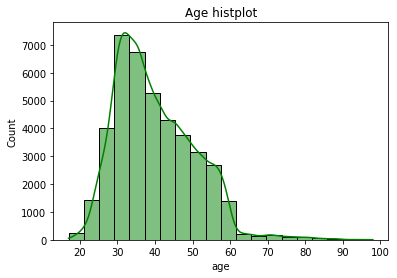

In [71]:
#3.8a checking histoplot for skewness
bank_skewness= bank_df.copy()
plt.plot(figsize= (10,30))
sns.histplot(bank_skewness, x = "age", bins=20, kde= True,color= "green", edgecolor="black")
plt.title("Age histplot")
plt.show()

Observation: The age variable is skewed to the right(positive skewness), this means the mean is greater than the mode.

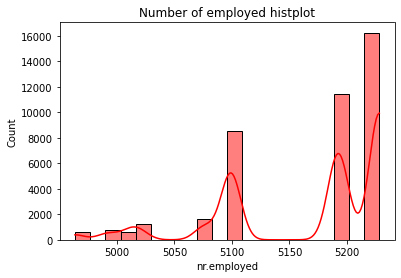

In [72]:
#3.8B checking histoplot for skewness
bank_skewness= bank_df.copy()
plt.plot(figsize= (10,30))
sns.histplot(bank_skewness, x = "nr.employed", bins=20, kde= True,color= "r", edgecolor="black")
plt.title("Number of employed histplot")
plt.show()

Observation: The nr.employed variable is skewed to the left(negative skewness), this means the mean is less than the mode.

In [73]:
#3.8c skewness for all numerical variables
bank_skewness.skew(axis = 0, skipna = True)

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

Observation:
* age, duration,campaign, previous,and cons.conf.idx are positively skewed(mean is greater than the mode)
* pdays, emp.var.rate, cons.price.idx, euribbor3m, and nr.employed variables are negatively skewed(mean is smaller than the mode)

In [74]:
#3.8d find skewness in each row
bank_skewness.skew(axis = 1, skipna=True)

0        2.966641
1        2.971583
2        2.968125
3        2.971076
4        2.963127
           ...   
41183    2.941945
41184    2.935301
41185    2.952351
41186    2.926920
41187    2.950231
Length: 41188, dtype: float64

In [75]:
#3.8e checking the columns namesj
print("bank_df dataset columns:", "\n", bank_df.columns)
print("*"*20)
# print("bank dataset columns:", "\n", bank.columns)

bank_df dataset columns: 
 Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
********************


Observation: both original and sample dataset have similar and same number of variables

## 4.0  Data cleaning

In [76]:
#4.1 making a copy to be used for data cleaning
bank_df1= bank_df.copy()
# bank_1= bank.copy()

In [77]:
#4.1a checking duplicates
print("bank_df dataset has {} duplicates".format(bank_df1.duplicated().sum()))
print("*"*20)
# print("bank dataset has {} duplicates".format(bank_1.duplicated().sum()))

bank_df dataset has 12 duplicates
********************


In [78]:
#4.1b dropping duplicates
bank_df1.drop_duplicates(keep='first', inplace=True)
#confirming no duplicates
print ("Is there any duplicates? ", bank_df1.duplicated().any())

Is there any duplicates?  False


#### 4.2 missing values

In [79]:
#4.2a checking the missing values
bank_df1.isnull().sum()


age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Observation:the following columns had missing values
* job - 330
* marital - 80
* education - 1731
* default - 8597
* housing - 990
* loan - 990


In [81]:
#4.2b Alternative way to detect missing values
#install the package
#!pip install missingno

#import library
# import missingno as an
# #
# #plot the missing values
# an.matrix(bank_df1)
# plt.show()

observation: 
* job, marital status, education, default, housing, and loan variables have missing values.


In [82]:
#4.2c checking the missing values %
for col in bank_df1.columns:
    print(col, '=','{:.2%}'.format(bank_df1[col].isna().sum() / bank_df1.shape[0]))

age = 0.00%
job = 0.80%
marital = 0.19%
education = 4.20%
default = 20.88%
housing = 2.40%
loan = 2.40%
contact = 0.00%
month = 0.00%
day_of_week = 0.00%
duration = 0.00%
campaign = 0.00%
pdays = 0.00%
previous = 0.00%
poutcome = 0.00%
emp.var.rate = 0.00%
cons.price.idx = 0.00%
cons.conf.idx = 0.00%
euribor3m = 0.00%
nr.employed = 0.00%
y = 0.00%


observation: 
* We see that all the missong data are in categorical variables
* Default variable has the highest missing values, followed by education, housing, loan, job, and marital status.

#### Dealing with  the missing values

In [83]:
#4.2d imputing null values for job variable with mode
bank_df1['job'] = bank_df1['job'].fillna(bank_df1['job'].mode()[0])
# bank_1['job'] = bank_1['job'].fillna(bank_1['job'].mode()[0])
bank_df1.job.isnull().sum()

0

In [84]:
#4.2e imputing mrital status with mode
bank_df1['marital'] = bank_df1['marital'].fillna(bank_df1['marital'].mode()[0])
# bank_1['marital'] = bank_1['marital'].fillna(bank_1['marital'].mode()[0])
bank_df1.marital.isna().sum()

0

In [85]:
# Getting the value counts for the education column in the data
bank_df1.education.value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
illiterate                18
Name: education, dtype: int64

In [86]:
#4.2f imputing education status with 'N/A'
bank_df1['education'] = bank_df1.education.fillna('N/A')
# bank_1['education'] = bank_1.education.fillna('N/A')
bank_df1.education.isna().sum()

0

In [87]:
#4.2g checking default variable class

bank_df1.default.value_counts()

no     32577
yes        3
Name: default, dtype: int64

In [88]:
#4.2h imputing default variable with mode
bank_df1['default'] = bank_df1['default'].fillna(bank_df1['default'].mode()[0])
# bank_1['default'] = bank_1['default'].fillna(bank_1['default'].mode()[0])
bank_df1.default.isna().sum()

0

In [89]:
#Dropping missing value in housing and loan since they are very few and will not affect our dataset
bank_df1.dropna(axis=0, how='any', inplace=True)
# bank_1.dropna(axis=0, how='any', inplace=True)
#
#checking missing values after this
bank_df1.isna().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

observation: our dataset has no missing values now.

#### 4.3 Replacing values

In [90]:
#Replacing the 999 value in pdays variable to zero
bank_df1['pdays'] = bank_df1['pdays'].replace([999],0)
# bank_1['pdays'] = bank_1['pdays'].replace([999],0)
#
#confirming the changes
bank_df1.pdays.unique()

array([ 0,  6,  4,  3,  5,  1, 10,  7,  9, 11,  2,  8, 12, 13, 14, 15, 16,
       21, 17, 18, 22, 25, 26, 19, 27, 20])

Observation: 999 value meant the respondednt was not contacted before campaign, we cahnged it to zero.

#### 4.4  checking for outliers

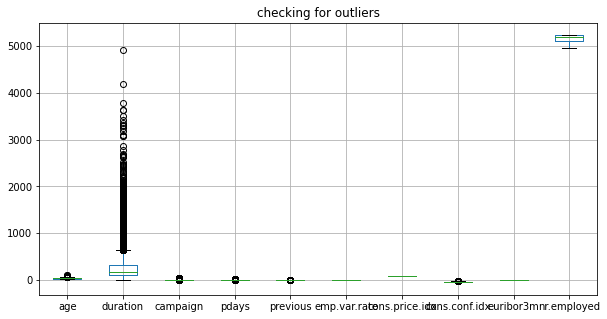

In [91]:
#4.4a checking for outliers
bank_df1.boxplot(figsize=(10,5))
plt.title("checking for outliers")
plt.show()

In [92]:
bank_df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

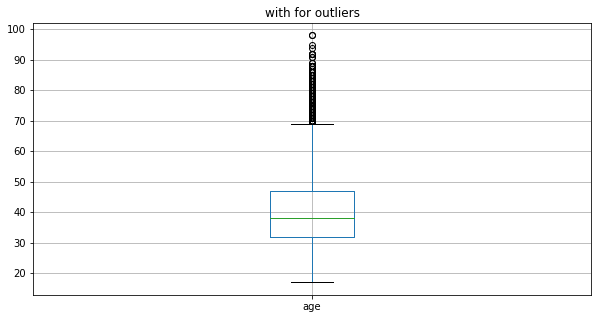

In [93]:
#4.4b getting a clear view of outliers for age column
bank_df1.boxplot(figsize=(10,5), column="age")
plt.title("with for outliers")
plt.show()

In [94]:
#Dealing with outliers
#computing the IQR
q1 = bank_df1["age"].quantile(0.25)
q3 = bank_df1["age"].quantile(0.75)
iqr = q3-q1

print("q1 :" ,q1, "\n", "q3 :" ,q3, "\n","iqr :", iqr)

q1 : 32.0 
 q3 : 47.0 
 iqr : 15.0


In [95]:
#outliers
lower_outlier = bank_df1["age"]< (q1-1.5*iqr)

bank_df1[lower_outlier|upper_outlier] # this shows bank_df1 with outliers

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27713,70,retired,divorced,basic.4y,no,yes,no,cellular,mar,mon,...,3,0,0,nonexistent,-1.8,92.843,-50.0,1.811,5099.1,yes
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,...,9,0,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,no
27780,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,1,0,1,failure,-1.8,92.843,-50.0,1.687,5099.1,no
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,1,0,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no
27802,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,2,0,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,retired,divorced,basic.4y,no,yes,yes,cellular,oct,mon,...,4,3,1,success,-1.1,94.601,-49.5,1.000,4963.6,no
40996,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,1,0,2,failure,-1.1,94.601,-49.5,1.016,4963.6,yes
41004,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,...,1,0,1,failure,-1.1,94.601,-49.5,1.025,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


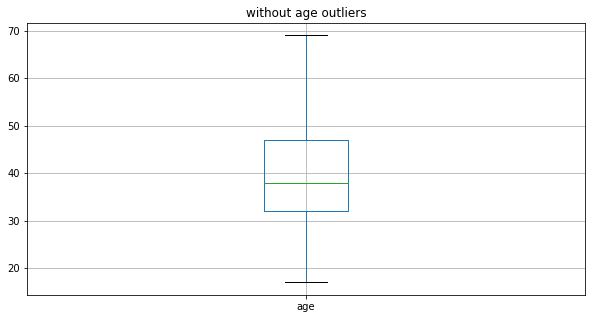

In [96]:
# checking data_df without outliers
bank_df2 = bank_df1[~(lower_outlier|upper_outlier)]
#
#checking the outliers 
bank_df2.boxplot(figsize=(10,5), column="age")
plt.title("without age outliers")
plt.show()

In [97]:
#checking mean
print("age variable mean before removing outlier is: ", bank_df1["age"].mean())
print("age variable mean after removing outlier is: ", bank_df2["age"].mean())

age variable mean before removing outlier is:  40.02558104812621
age variable mean after removing outlier is:  39.598937750144735


In [99]:
#Removing outliers in age variable in  bank_1 dataset

# #computing the IQR
# q1 = bank_1["age"].quantile(0.25)
# q3 = bank_1["age"].quantile(0.75)
# iqr = q3-q1
# print("Interquartile","\n", "q1 :" ,q1, "\n", "q3 :" ,q3, "\n","iqr :", iqr)
# #
# #outlier
# lower_outlier = bank_1["age"]< (q1-1.5*iqr)
# upper_outlier = bank_1["age"] > (q3+1.5*iqr)
# # bank_1[lower_outlier|upper_outlier] # this shows bank_1 with outliers
# #
# # checking data_df without outliers
# # bank_2 = bank_1[~(lower_outlier|upper_outlier)]
# #
# #checking the outliers 
# # bank_2.boxplot(figsize=(8,3), column="age")
# plt.title("sample dataset without age outliers")
# plt.show()

#### Observation:
* we removed the age outlier.
* other variable outliers will remain since they look genuine.
    

In [100]:
# dropping 'Unnessary columns 
bank_df2 = bank_df2.drop(columns = ['duration', 'contact'])
# bank_2= bank_2.drop(columns = ['duration', 'contact'])

#### 4.5  Making the columns/variable uniform

In [101]:
#4.5a Renaming the column names
bank_df2.rename(columns={'y':'term_deposit','housing':'housing_loan','loan':'personal_loan', 'month':'last contact month','campaign':'num contact compaign'  }, inplace=True)
# bank_2.rename(columns={'y':'term_deposit','housing':'housing_loan','loan':'personal_loan', 'month':'last contact month','campaign':'num contact compaign'  }, inplace=True)
bank_df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing_loan',
       'personal_loan', 'last contact month', 'day_of_week',
       'num contact compaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'term_deposit'],
      dtype='object')

In [102]:
#4.5b Making the colunms standard
bank_df2.columns=bank_df2.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '_')
# bank_2.columns=bank_df2.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '_')
bank_df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing_loan',
       'personal_loan', 'last_contact_month', 'day_of_week',
       'num_contact_compaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'term_deposit'],
      dtype='object')

In [103]:
#Removing any duplicates that might have been generated during data cleaning, checking missing values
bank_df2.drop_duplicates(keep='first', inplace=True)
# bank_2.drop_duplicates(keep='first', inplace=True)
#confirming no duplicates
print ("Is there any duplicates? ", bank_df2.duplicated().any())
#
#checking missing values
print ("Is there any missing values? ", bank_df2.isna().sum().any())


Is there any duplicates?  False
Is there any missing values?  False


In [104]:
#checking the cleaned dataset shape
print("original dataset shape", bank_df.shape)
print("cleaned dataset shape", bank_df2.shape)

print("*"*50)

# print("original sample dataset shape", bank.shape)
# print("cleaned sample dataset shape", bank_2.shape)

original dataset shape (41188, 21)
cleaned dataset shape (37558, 19)
**************************************************


In [105]:
# clean dataset
bank_df_clean= bank_df2.copy()
# bank_clean = bank_2.copy()
#
#saving the clean files
#
bank_df_clean.to_csv("bank_full_clean.csv")
# bank_clean.to_csv("bank_sample_clean.csv")